# **TP3 : Support Vector Machine (SVM) with Sklearn**
----

In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time 

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import precision_score, classification_report, confusion_matrix

## Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [0]:
data = mnist.data / 255.
labels = mnist.target
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training data :  (70000, 784)
Shape of label :  (70000,)


In [0]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Split training & test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size=0.7)

# X_train, y_train = X_train[:500], y_train[:500]
# X_test, y_test = X_test[:500], y_test[:500]

print("Training data shape : ", X_train.shape)
print("Training target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Training data shape :  (49000, 784)
Training target shape :  (49000,)
Testing data shape :  (21000, 784)
Testing target shape :  (21000,)


## Create a Linear SVM classifier

In [0]:
%%time 
clf = LinearSVC()
clf.fit(X_train,y_train)

CPU times: user 1min 3s, sys: 47.3 ms, total: 1min 3s
Wall time: 1min 3s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Prediction score

In [0]:
%%time 
y_pred = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1966
           1       0.95      0.98      0.96      2388
           2       0.91      0.87      0.89      2074
           3       0.88      0.88      0.88      2134
           4       0.91      0.93      0.92      2006
           5       0.88      0.86      0.87      1947
           6       0.94      0.95      0.95      2023
           7       0.92      0.92      0.92      2236
           8       0.88      0.85      0.87      2107
           9       0.87      0.88      0.88      2119

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91     

## **Hyperparameter tuning for SVM**

### ***1. Kernel function***

In [0]:
train_scores = []
test_scores = []
exec_times = []

In [0]:
%%time
## linear
clf = SVC(kernel='linear',max_iter=100)
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training execution time : 76.51933499999996
Prediction time : 89.02673400000003
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=100, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1966
           1       0.84      0.93      0.88      2388
           2       0.68      0.77      0.72      2074
           3       0.61      0.73      0.67      2134
           4       0.70      0.80      0.75      2006
           5       0.73      0.65      0.69      1947
           6       0.89      0.72      0.80      2023
           7       0.85      0.76      0.80      2236
           8       0.61      0.50      0.55      2107
           9       0.65      0.63      0.64      2119

    accuracy                           0

In [0]:
%%time
## poly
clf = SVC(kernel='poly',gamma='scale',max_iter=100)
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training execution time : 96.4804779999995
Prediction time : 51.10190500000044
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1966
           1       0.99      0.14      0.24      2388
           2       0.83      0.61      0.71      2074
           3       0.89      0.31      0.46      2134
           4       0.89      0.13      0.23      2006
           5       0.93      0.36      0.52      1947
           6       0.88      0.92      0.90      2023
           7       0.70      0.25      0.37      2236
           8       0.39      0.79      0.53      2107
           9       0.25      0.95      0.39      2119

    accuracy                           0.53     21000

In [0]:
%%time
## rbf
clf = SVC(kernel='rbf', gamma='scale',max_iter=100)
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training execution time : 97.06890600000042
Prediction time : 92.5181249999996
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1966
           1       0.98      0.99      0.99      2388
           2       0.94      0.96      0.95      2074
           3       0.94      0.93      0.93      2134
           4       0.94      0.89      0.91      2006
           5       0.95      0.93      0.94      1947
           6       0.97      0.98      0.98      2023
           7       0.91      0.92      0.92      2236
           8       0.96      0.93      0.95      2107
           9       0.83      0.88      0.86      2119

    accuracy                           0.94     21000


In [0]:
%%time
## sigmoid
clf = SVC(kernel='sigmoid',gamma='scale',max_iter=100)
start =  time.clock()
clf.fit(X_train,y_train)
end_train = time.clock()
print("Training execution time :", end_train - start)
y_pred = clf.predict(X_test)
end_pred = time.clock() 
print("Prediction time :", end_pred - end_train)
print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

train_scores.append(clf.score(X_train,y_train))
test_scores.append(clf.score(X_test,y_test))
exec_times.append(end_train-start)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training execution time : 100.34785900000043
Prediction time : 84.77414899999985
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1966
           1       0.87      0.78      0.82      2388
           2       0.42      0.08      0.14      2074
           3       0.57      0.03      0.06      2134
           4       0.67      0.08      0.15      2006
           5       0.46      0.20      0.28      1947
           6       0.59      0.86      0.70      2023
           7       0.77      0.21      0.33      2236
           8       0.22      0.65      0.33      2107
           9       0.30      0.91      0.45      2119

    accuracy                           0.43     

In [0]:
## precomputed
# clf = SVC(kernel='precomputed')
# start =  time.clock()
# clf.fit(X_train,y_train)
# end_train = time.clock()
# print("Training execution time :", end_train - start)
# y_pred = clf.predict(X_test)
# end_pred = time.clock() 
# print("Prediction time :", end_pred - end_train)
# print("Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, y_pred)))
# print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

# scores.append(clf.score(X_test,y_test))
# exec_times.append(end_train-start)

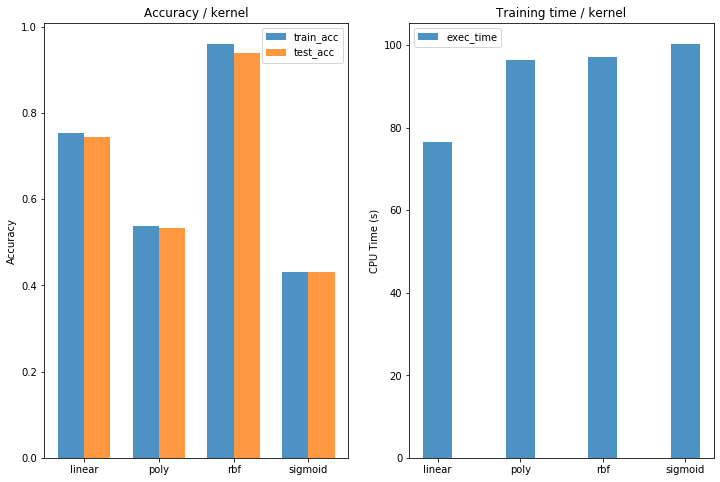

<Figure size 432x288 with 0 Axes>

In [0]:
## PLOT
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
y_pos = np.arange(len(kernels))
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.bar(y_pos,train_scores,bar_width,align='center',alpha=opacity,label='train_acc')
plt.bar(y_pos+bar_width,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
plt.xticks(y_pos+bar_width/2,kernels)
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy / kernel')

plt.subplot(122)
plt.bar(y_pos,exec_times,bar_width,align='center',alpha=opacity,label='exec_time')
plt.xticks(y_pos,kernels)
plt.ylabel('CPU Time (s)')
plt.legend()
plt.title('Training time / kernel')

plt.show()
plt.savefig('TP3-kernel.png')

### ***2. Penalty parameter C of the error term***

In [0]:
%%time
c_settings = np.array([0.1,0.25,0.5,0.75,1.0])
n_iters = np.array([0,20,40,60,80,100])
all_scores = []
# all_times = []
for c in c_settings : 
    print("With C={}...".format(c))
    train_time, test_scores = [], []
    for it in n_iters:
        clf = SVC(kernel='linear', C=c, max_iter=it)
        # start = time.clock()
        clf.fit(X_train,y_train)
        # exec_time = time.clock() - start
        # train_time.append(exec_time)
        test_scores.append(clf.score(X_test,y_test))
    # all_times.append(train_time)
    all_scores.append(test_scores)

With C=0.1...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: C

With C=0.25...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: C

With C=0.5...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: C

With C=0.75...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: C

With C=1.0...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: C

CPU times: user 46min 32s, sys: 288 ms, total: 46min 32s
Wall time: 46min 34s


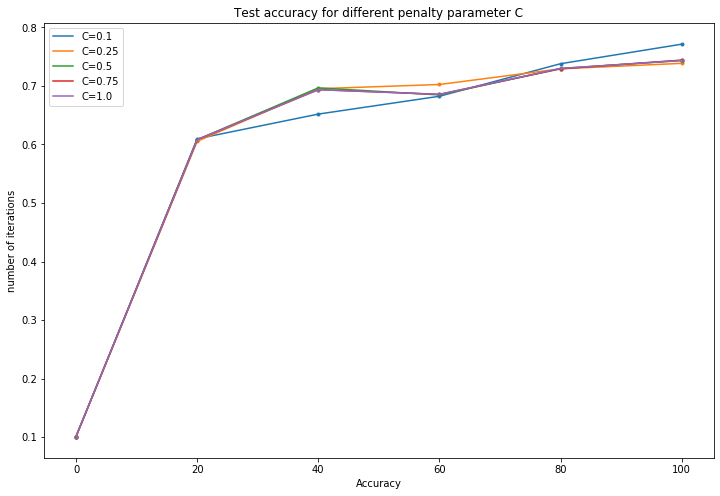

In [0]:
## PLOT
plt.figure(figsize=(12,8))
for i in range(len(c_settings)):
    plt.plot(n_iters,all_scores[i],label='C={}'.format(c_settings[i]))
    plt.scatter(n_iters,all_scores[i],marker='.')
plt.legend(loc='best')
plt.title("Test accuracy for different penalty parameter C")
plt.xlabel("Accuracy")
plt.ylabel("number of iterations")

plt.show()

----